In [6]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.stats import gaussian_kde
import glob

In [57]:
period = 5
dealias = 2 / 3
eta = 0.01172
folder = 'data/ns*iso*/'

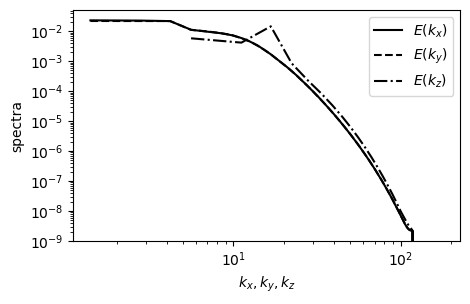

In [60]:
file_path = glob.glob(folder + 'spectra1d.h5')[-1]

diss_length = dealias * np.pi / (2 * eta)

with h5py.File(file_path, 'r') as hdf_file:
    kx = dealias * hdf_file['kx'][:]
    ky = dealias * hdf_file['ky'][:]
    kz = dealias * hdf_file['kz'][:]
    spectra_E_kx = hdf_file['spectra_E_kx'][:]
    spectra_E_ky = hdf_file['spectra_E_ky'][:]
    spectra_E_kz = hdf_file['spectra_E_kz'][:]
    times = hdf_file['times'][:]
    
filtered_spectra_E_kx = spectra_E_kx[times > period]
filtered_spectra_E_ky = spectra_E_ky[times > period]
filtered_spectra_E_kz = spectra_E_kz[times > period]

spectra_E_kx_mean = np.mean(filtered_spectra_E_kx, axis=0)
spectra_E_ky_mean = np.mean(filtered_spectra_E_ky, axis=0)
spectra_E_kz_mean = np.mean(filtered_spectra_E_kz, axis=0)

plt.figure(figsize=(5, 3))

k53 = False

if k53:
    power = 5/3
else:
    power = 0

plt.loglog(kx[1:], spectra_E_kx_mean[1:] * kx[1:]**(power), 'k-', label='$E(k_x)$')
plt.loglog(ky[1:], spectra_E_ky_mean[1:] * ky[1:]**(power), 'k--', label='$E(k_y)$')
plt.loglog(kz[1:], spectra_E_kz_mean[1:] * kz[1:]**(power), 'k-.', label='$E(k_z)$')

#plt.loglog(kx[1:], 10**-2 * kx[1:]**(-5/3), 'k--', label='$k^{-5/3}$')


plt.xlabel('$k_x, k_y, k_z$')
plt.ylabel('spectra')

plt.ylim(bottom=10**-9)

plt.legend()
#lt.savefig('1d_spectra.png', dpi=300)

plt.show()

data/ns3d_iso_256/spectra3d.h5


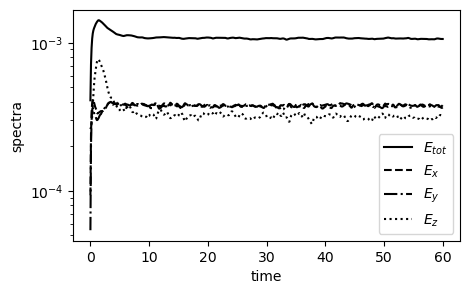

Plot saved as '3d_spectrum.png'


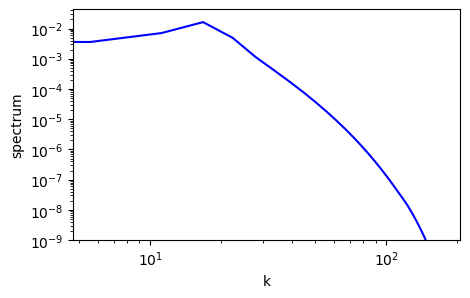

In [70]:
file_path = glob.glob(folder + 'spectra3d.h5')[-1]
print(file_path)
period = 5

with h5py.File(file_path, 'r') as hdf_file:
    k_spectra3d = dealias * hdf_file['k_spectra3d'][:]
    spectra_E = hdf_file['spectra_E'][:]
    spectra_u = hdf_file['spectra_vx'][:]
    spectra_v = hdf_file['spectra_vy'][:]
    spectra_w = hdf_file['spectra_vz'][:]
    times = hdf_file['times'][:]

spectra_E_mean = np.mean(spectra_E, axis=1)
spectra_u_mean = np.mean(spectra_u, axis=1)
spectra_v_mean = np.mean(spectra_v, axis=1)
spectra_w_mean = np.mean(spectra_w, axis=1)


plt.figure(figsize=(5, 3))
plt.semilogy(times, spectra_E_mean, 'k-', label='$E_{tot}$')
plt.semilogy(times, spectra_u_mean, 'k--', label='$E_x$')
plt.semilogy(times, spectra_v_mean, 'k-.', label='$E_y$')
plt.semilogy(times, spectra_w_mean, 'k:', label='$E_z$')

plt.xlabel('time')
plt.ylabel('spectra')

plt.legend()

#plt.savefig('3d_spectra_time.png', dpi=300)

plt.show()

filtered_E = spectra_E[times > period]

spectra_E_mean = np.mean(filtered_E, axis=0)

plt.figure(figsize=(5, 3))
plt.loglog(k_spectra3d, spectra_E_mean, 'b-')

plt.xlabel('k')
plt.ylabel('spectrum')

plt.ylim(bottom=10**-9)

#plt.savefig('3d_spectrum.png', dpi=300)
print("Plot saved as '3d_spectrum.png'")


data/ns3d_iso_256/state_phys_t0060.001.h5
Re:1850323928
Plot saved as 'richardson_pdf.png'


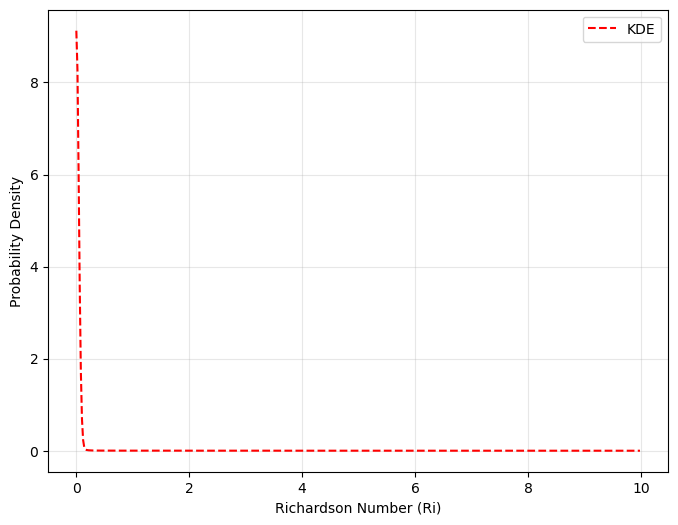

In [62]:
Lz = 0.75
nz = 64
dz = Lz / nz
N = 1
all_Ri = []

state_phys_pattern = 'state_phys*.h5'
state_phys_list = sorted(glob.glob(folder + state_phys_pattern))

for idx, file_path in enumerate(state_phys_list):
    with h5py.File(file_path, 'r') as f:
        u = f['state_phys/vx'][:]
        v = f['state_phys/vy'][:]
        
        uh = np.sqrt(u**2 + v**2)
        duh_dz = np.gradient(uh, dz, axis=0)
        Ri = (N**2 / (duh_dz[duh_dz!=0]**2)).ravel()
        
        all_Ri.append(Ri[Ri < 10])
        Re = np.mean([np.abs(np.mean(u)) * 3 / 1e-6, np.abs(np.mean(v)) * 3 / 1e-6])
        print(file_path)
        print(f'Re:{Re:.0f}')
all_Ri_array = np.concatenate(all_Ri)

plt.figure(figsize=(8, 6))

# Compute and plot the KDE
kde = gaussian_kde(all_Ri_array)
x_vals = np.linspace(np.min(all_Ri_array), np.max(all_Ri_array), 500)
plt.plot(x_vals, kde(x_vals),'r--', label='KDE')

plt.xlabel('Richardson Number (Ri)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)

#plt.savefig('richardson_pdf.png', dpi=300)
print("Plot saved as 'richardson_pdf.png'")
plt.show()

/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_59282/2371684075.py:46: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


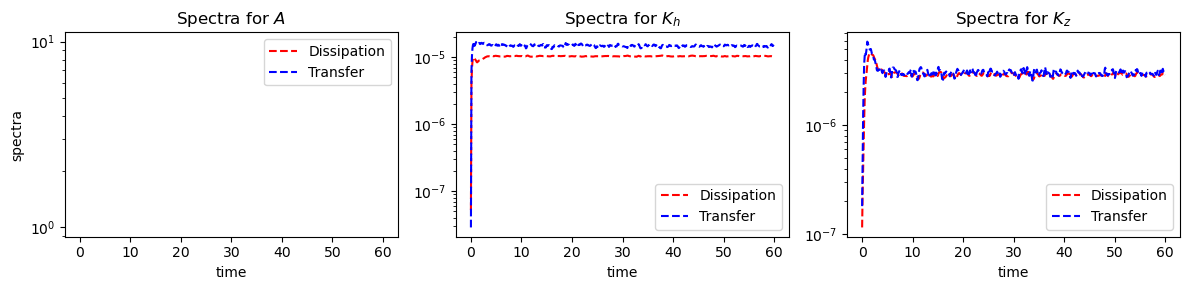

In [65]:
file_path = glob.glob(folder + 'spect_energy_budg.h5')[-1]
period = 5

with h5py.File(file_path, 'r') as hdf_file:
    diss_Kh = hdf_file['diss_Kh'][:]
    transfer_Kh = hdf_file['transfer_Kh'][:]
    diss_Kz = hdf_file['diss_Kz'][:]
    transfer_Kz = hdf_file['transfer_Kz'][:]
    times = hdf_file['times'][:]
    if file_path.__contains__('strat'):   
        diss_A = hdf_file['diss_A'][:]
        transfer_A = hdf_file['transfer_A'][:]
    else:
        diss_A = np.zeros(diss_Kh.shape)
        transfer_A = np.zeros(diss_Kh.shape)

diss_A = np.mean(diss_A, axis=(1,2))
transfer_A = np.mean(np.abs(transfer_A), axis=(1,2))

diss_Kh = np.mean(diss_Kh, axis=(1,2))
transfer_Kh = np.mean(np.abs(transfer_Kh), axis=(1,2))

diss_Kz = np.mean(diss_Kz, axis=(1,2))
transfer_Kz = np.mean(np.abs(transfer_Kz), axis=(1,2))

fig, axes = plt.subplots(1, 3, figsize=(12, 3))  

axes[0].semilogy(times, diss_A, 'r--', label='Dissipation')
axes[0].semilogy(times, transfer_A, 'b--', label='Transfer')
axes[0].set_xlabel('time')
axes[0].set_ylabel('spectra')
axes[0].legend()
axes[0].set_title('Spectra for $A$')

axes[1].semilogy(times, diss_Kh, 'r--', label='Dissipation')
axes[1].semilogy(times, transfer_Kh, 'b--', label='Transfer')
axes[1].set_xlabel('time')
axes[1].legend()
axes[1].set_title('Spectra for $K_h$')

axes[2].semilogy(times, diss_Kz, 'r--', label='Dissipation')
axes[2].semilogy(times, transfer_Kz, 'b--', label='Transfer')
axes[2].set_xlabel('time')
axes[2].legend()
axes[2].set_title('Spectra for $K_z$')
plt.tight_layout()
#plt.savefig('spectra_transfer.png', dpi=300)
plt.show()